In [20]:
library(multtest)
data(golub)
gene1.values = golub[1,]
gene1.values[1:5]
options(warn=-1)

[1] -1.45769 -1.39420 -1.42779 -1.40715 -1.42668

# Problem 1

I did this problem mostly correct. I used the right formula but yielded the wrong values. I also didn't apply CLT for some of the last questions. Correct approach to CI, but wrong bounds.

# Problem 2

Part 1 (a) is correct. 

Part b is inccorect i accidently put sd in the numerator instead of the MLEs. 

Part c i didnt get to on time but understand now.

Part d i did correct!

Part e i didnt get but understand now.



# Problem 3

I got this correct.

# Problem 4

I did this 100% correct.

4.a)
\begin{equation} 
If E[x] = \mu = \frac{\alpha}{3}, \,thus\,,\, by \;random \;sampling\;,\, E{\bar{x} = E[x] = \mu} \\
\therefore E[3\bar{x}]=3\mu = \alpha
\end{equation} 

4.b)
\begin{equation} 
E[x^2] -\mu^2 = (\frac{1}{3} - \frac{\alpha^2}{9}), thus \; the \; variance \; of \; [3\bar{x}] = 9Var[x]/n = \frac{(3-\alpha^2)}{n}
\end{equation} 

4.c)
\begin{equation} 
\hat{\alpha} 
\end{equation} 
will be asymptotically normally distributed with mean of α and var of (3-α^2)/n.

\begin{equation} 
var = (3 - 1^2) / 20 = 2/20 = 1/10 \\
mean = 1
\end{equation} 

In [14]:
#4.c) calculation
pnorm(.5, mean = 1, sd = sqrt(1/10), lower.tail = FALSE) #.5 to infinity

[1] 0.9430769

# Problem 5

I did mostly every thing right, messed up some little bootstrap stuff towards the end.

5.a)
\begin{equation} 
\frac{\partial }{\partial \theta}I(\theta)= \frac{-2n_1+n_2}{1-\theta}+ \frac{2n_3+n_2}{\theta} \\
0 = \frac{-2n_1+n_2}{1-\theta}+ \frac{2n_3+n_2}{\theta} \\
\theta_{MLE} = \frac{2n_3+n_2}{2n_1+2n_2+2n_3} \\
= \frac{2*112+68}{2*190} = .76842
\end{equation} 

5.b)

\begin{equation} 
Var(\theta_{MLE}) \overset{P}{\rightarrow} \frac{1}{nl(\theta_{MLE})} \\
= \frac{1}{190(.76642)(1-.76642)} = \frac{1}{190(.17795)} = .03
\end{equation} 

5.c)
\begin{equation} 
I(\theta _{MLE}) = \frac{2n}{\theta_{MLE}(1-\theta_{MLE})} \\
= \frac{2*190}{(.76642)(1-.76642)} = 2,135.42 
\end{equation} 

\begin{equation} 
CI = (\theta_{MLE} - \frac{Z(\alpha/2)}{\sqrt{l(\theta_{MLE}})}\;, \;\theta_{MLE} + \frac{Z(\alpha/2)}{\sqrt{l(\theta_{MLE}})})\\
= (.76842-\frac{2.576}{\sqrt{2,135.42}} \;,\; .76842+\frac{2.576}{\sqrt{2,135.42}}) \\
= (.71267 \; , \; .82416)
\end{equation} 

In [15]:
#5d
sim.samples = rmultinom(10000, size=190, prob=c(0.0526, 0.35789, 0.58947)) # prob = 10/190,68/190, 112/190
sim.samples[,1:10]

thetaMLE = function(n1, n2, n3) {
    return ((2*n3 + n2)/(2*(n1+n2+n3)))
}

theta.hats = apply(sim.samples, 2, function(x) {
    return (thetaMLE(x[1], x[2], x[3]))
 })

11,9,9,9,15,5,10,12,9,13
59,63,67,78,62,87,67,69,71,51
120,118,114,103,113,98,113,109,110,126


[1] 0.7868421 0.7868421 0.7763158 0.7473684 0.7578947

[1] 0.02184592

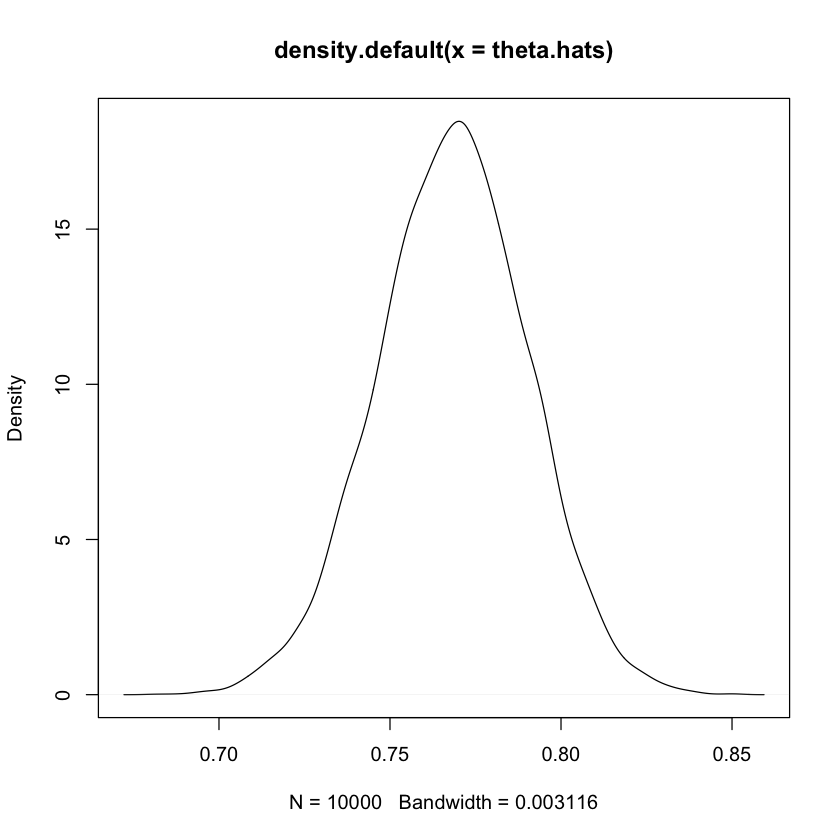

In [16]:
#5d
theta.hats[1:5]
sd(theta.hats)
plot(density(theta.hats))

5d) The bootstrap sample is actually really close to the MLE done asymptotic. My asymptotic MLE was .76842 and my bootstrap MLE (.768472) is very close to that!

In [17]:
mean(theta.hats)

[1] 0.7682782

In [18]:
#5e
denom = ((mean(theta.hats)) * (1 - (mean(theta.hats)))) #denominator
newd = (denom*190) #multiply by n
var = 1/newd #finish equation
print(var) 

[1] 0.02956385


5e) our variance rounds also to .03

In [19]:
#5f
exactCI = function(values, alpha) {
 x.bar = mean(values)
         n = length(values)
 t.n_1 = -qt(alpha/2, df=n-1)
         S = sd(values)
 CI = c(x.bar - (S*t.n_1)/sqrt(n),
 x.bar + (S*t.n_1)/sqrt(n))
 return(CI)
}
 (exact.CI = exactCI(theta.hats, alpha=0.01))

[1] 0.7677153 0.7688410

5f) our 99% CI using bootstrap is tighter than our approximation in our part 5c. Both our CI's contain our null value.